# Class documentation

In [1]:
try:
    from main_estimate import *
except:
    print('Error check packages dependencies / Kernel')

## (1) CPIframe

```python
# === Data (index = HICP & Qt without log transf.) ===
df_w = pd.read_excel("data/data_flat.xlsx",sheet_name="weights")
df_q_index = pd.read_excel("data/data_flat.xlsx",sheet_name="QT_index")
df_p_index = pd.read_excel("data/data_flat.xlsx",sheet_name="P_index")

class CPIframe:
    def __init__(self, df_q_index, df_p_index, df_w, country):
        """
        Args:
            df_q_index (DataFrame): The Quantity data (index).
            df_p_index (DataFrame): The Price data (index).
            df_w (DataFrame): The respective Weights data.
            country (str): Location available (EU27,France,Germany,Spain).
        """
````

In [2]:
eu = CPIframe(df_q_index=df_q_index, df_p_index=df_p_index, df_w=df_w, country="EU27")
print([atr for atr in dir(eu) if "__" not in atr])

['country', 'dates', 'end_flag', 'flag', 'flag_sector', 'flag_summary', 'framing', 'inflation', 'overall', 'price', 'price_index', 'qt', 'qt_index', 'sector', 'sector_inf', 'sectors', 'start_flag', 'weights']


- *flag_sectors*, *framing* and *sector* are methods for the class *CPIframe*
- *price_index* and *price* (data of *price_index* log-transformed) are subset dataframes of initial *df_p_index* (Price data) restricted to *country*
- *qt_index* and *qt* (data of *qt_index* log-transformed) are subset dataframes of initial *df_q_index* (Quantity data = demand proxy) restricted to *country*

In [3]:
eu.sectors   #COICOP 4-digit categories
#eu.inflation #MoM inflation rate dataframe
#eu.weights    #DataFrame of Annual sector weights in the overall HICP 
#eu.price
#eu.price_index
#eu.qt
#eu.qt_index

{0: 'Bread and cereals',
 1: 'Meat',
 2: 'Fish and seafood',
 3: 'Milk, cheese and eggs',
 4: 'Oils and fats',
 5: 'Fruit',
 6: 'Vegetables',
 7: 'Sugar, jam, honey, chocolate and confectionery',
 8: 'Food products n.e.c.',
 9: 'Coffee, tea and cocoa',
 10: 'Mineral waters, soft drinks, fruit and vegetable juices',
 11: 'Spirits',
 12: 'Wine',
 13: 'Beer',
 14: 'Tobacco',
 15: 'Clothing materials',
 16: 'Garments',
 17: 'Other articles of clothing and clothing accessories',
 18: 'Cleaning, repair and hire of clothing',
 19: 'Shoes and other footwear',
 20: 'Repair and hire of footwear',
 21: 'Actual rentals for housing',
 22: 'Maintenance and repair of the dwelling',
 23: 'Water supply and miscellaneous services relating to the dwelling',
 24: 'Electricity, gas and other fuels',
 25: 'Furniture and furnishings',
 26: 'Carpets and other floor coverings',
 27: 'Repair of furniture, furnishings and floor coverings',
 28: 'Household textiles',
 29: 'Major household appliances whether elect

In [5]:
eu.flag_summary()

0  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Bread and cereals
1  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Meat
2  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Fish and seafood
3  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Milk, cheese and eggs
4  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Oils and fats
5  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Fruit
6  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Vegetables
7  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Sugar, jam, honey, chocolate and confectionery
8  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Food products n.e.c.
9  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Coffee, tea and cocoa
10  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Mineral waters, soft drinks, fruit and vegetable juices
11  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Spirits
12  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Wine
13  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Beer
14  : OK  2001 - 1 ; 2023 - 9  --  273  obs. --  Tobacco
15  : end 

## (2) sector_estimation

Builds on a `CPIframe`object.

```python
class sector_estimation:
    def __init__(self,
                 meta:CPIframe,
                 col:int,
                 order:Union[int, str]="auto",maxlag=24,trend="n",
                 shapiro:bool=True,
                 shapiro_robust:bool=False,
                 sheremirov:bool=True,
                 sheremirov_window:list=[1,11]):
        """
        Args:
            - `meta`: `CPIframe` object
            - `col`: sector column number in [0,93]
            - If too litte data for sector 'col' then raises ValueError
            - VAR model is built with first diff then demeand log-transformed data
            - `classify_inflation`: if False only returns Shapiro and Sheremirov classification in binary form 
                Otherwise returns [classified weighted inflation rate] : 1(dem)*weight*inf_rate & 1(sup)*w*inf_rate 
                
            `VAR parametrization`
            order: if "auto" VAR order is automatically selected. Else requires an integer
            maxlag: higher bound of order selection
            trend: should remain "n" because data have been demeaned and are supposed to be stationary (no trend)
            
            `Labeling methods`
            shapiro: if True computes baseline Shapiro(2022) labeling method with reduced-form estimated VAR
            shapiro_robustness: if True also computes alternative labeling methodologies
            sheremirov: if True computes baseline Sheremirov(2022) labeling method
            sheremirov_window: [Transitory,Persistent] parametrization of step classification algo step5
        """

**ex: For a given sector in column col=64**

#### 1/ Automatic lag order selection

In [6]:
# When order is automatically selected results accessible via aic and bic are accessed via (...).aic or (...).bic
test_sect_estim1 = sector_estimation(meta=eu, col=64, shapiro_robust=True)
test_sect_estim12 = sector_estimation(meta=eu, col=64, shapiro_robust=True, classify_inflation=False)
test_sect_estim1.sec_name

'Recording media'

In [9]:
#test_sect_estim1.aic.summary() #Estimated model with AIC
#test_sect_estim1.aic.shapiro #Shapiro classification (without alternative methods)
print('> Shapiro classification')
print('Baseline:dem-sup \nSmoothed classification:dem-sup_j1 to dem-sup_j3 \nParametric classification:dem-sup_param')
#display(test_sect_estim1.aic.shapiro_robust)
display(test_sect_estim1.aic.shapiro_robust.dropna())
print('> Sheremirov classification')
#display(test_sect_estim1.sheremirov)
display(test_sect_estim1.sheremirov.dropna())

> Shapiro classification
Baseline:dem-sup 
Smoothed classification:dem-sup_j1 to dem-sup_j3 
Parametric classification:dem-sup_param


,dem,sup,dem_j1,sup_j1,dem_j2,sup_j2,dem_j3,sup_j3,dem_param,sup_param
2002-12-01,-0.000000,-0.000353,-0.000353,-0.000000,-0.000353,-0.000000,-0.000000,-0.000353,-0.000164,-0.000189
2003-01-01,0.000601,0.000000,0.000000,0.000601,0.000601,0.000000,0.000601,0.000000,0.000311,0.000290
2003-02-01,-0.000000,-0.000480,-0.000480,-0.000000,-0.000480,-0.000000,-0.000480,-0.000000,-0.000232,-0.000248
2003-03-01,0.000000,0.000090,0.000000,0.000090,0.000090,0.000000,0.000000,0.000090,0.000044,0.000046
2003-04-01,-0.000000,-0.000961,-0.000000,-0.000961,-0.000000,-0.000961,-0.000961,-0.000000,-0.000450,-0.000511
...,...,...,...,...,...,...,...,...,...,...
2023-04-01,-0.000448,-0.000000,-0.000448,-0.000000,-0.000448,-0.000000,-0.000448,-0.000000,-0.000230,-0.000218
2023-05-01,-0.002085,-0.000000,-0.002085,-0.000000,-0.000000,-0.002085,-0.000000,-0.002085,-0.001552,-0.000533
2023-06-01,0.000000,0.001869,0.001869,0.000000,0.001869,0.000000,0.001869,0.000000,0.000831,0.001038
2023-07-01,-0.000000,-0.000887,-0.000887,-0.000000,-0.000887,-0.000000,-0.000000,-0.000887,-0.000429,-0.000458


> Sheremirov classification


,dem,sup,dem_pers,dem_trans,sup_pers,sup_trans
2001-12-01,0.0,0.001455,0.0,0.0,0.000000,0.0
2002-01-01,0.0,0.000702,0.0,0.0,0.000000,0.0
2002-02-01,-0.0,-0.000117,-0.0,-0.0,-0.000000,-0.0
2002-03-01,0.0,0.000526,0.0,0.0,0.000000,0.0
2002-04-01,-0.0,-0.000496,-0.0,-0.0,-0.000000,-0.0
...,...,...,...,...,...,...
2023-04-01,-0.0,-0.000448,-0.0,-0.0,-0.000448,-0.0
2023-05-01,-0.0,-0.002085,-0.0,-0.0,-0.002085,-0.0
2023-06-01,0.0,0.001869,0.0,0.0,0.001869,0.0
2023-07-01,-0.0,-0.000887,-0.0,-0.0,-0.000887,-0.0


In [10]:
print('> Shapiro classification classify_inflation=False')
print('Baseline:dem-sup \nSmoothed classification:dem-sup_j1 to dem-sup_j3 \nParametric classification:dem-sup_param')
#display(test_sect_estim12.aic.shapiro_robust)
display(test_sect_estim12.aic.shapiro_robust.dropna())
print('> Sheremirov classification classify_inflation=False')
#display(test_sect_estim12.sheremirov)
display(test_sect_estim12.sheremirov.dropna())

> Shapiro classification classify_inflation=False
Baseline:dem-sup 
Smoothed classification:dem-sup_j1 to dem-sup_j3 
Parametric classification:dem-sup_param


,dem,sup,dem_j1,sup_j1,dem_j2,sup_j2,dem_j3,sup_j3,dem_param,sup_param
2002-12-01,0,1,1,0,1,0,0,1,0.464057,0.535943
2003-01-01,1,0,0,1,1,0,1,0,0.517994,0.482006
2003-02-01,0,1,1,0,1,0,1,0,0.484186,0.515814
2003-03-01,0,1,0,1,1,0,0,1,0.493058,0.506942
2003-04-01,0,1,0,1,0,1,1,0,0.467915,0.532085
...,...,...,...,...,...,...,...,...,...,...
2023-04-01,1,0,1,0,1,0,1,0,0.514248,0.485752
2023-05-01,1,0,1,0,0,1,0,1,0.744368,0.255632
2023-06-01,0,1,1,0,1,0,1,0,0.444465,0.555535
2023-07-01,0,1,1,0,1,0,0,1,0.483442,0.516558


> Sheremirov classification classify_inflation=False


,dem,sup,dem_pers,dem_trans,sup_pers,sup_trans
2001-12-01,0,1,0,0,0,0
2002-01-01,0,1,0,0,0,0
2002-02-01,0,1,0,0,0,0
2002-03-01,0,1,0,0,0,0
2002-04-01,0,1,0,0,0,0
...,...,...,...,...,...,...
2023-04-01,0,1,0,0,1,0
2023-05-01,0,1,0,0,1,0
2023-06-01,0,1,0,0,1,0
2023-07-01,0,1,0,0,1,0


In [12]:
test_sect_estim1.inflation
# inflation (infw) is MoM%HICP * weight in overall HICP

,infw
2000-01-01,NaN
2000-02-01,NaN
2000-03-01,NaN
2000-04-01,NaN
2000-05-01,NaN
...,...
2023-05-01,-0.002085
2023-06-01,0.001869
2023-07-01,-0.000887
2023-08-01,0.000838


#### 2/ Fixed order

In [13]:
# When order is hand-fixed results are accessible via (...).estimate
test_sect_estim2 = sector_estimation(meta=eu, col=64, order=12, shapiro_robust=True)
test_sect_estim22 = sector_estimation(meta=eu, col=64, order=12, shapiro_robust=True, classify_inflation=False)

In [14]:
#test_sect_estim2.estimate.summary() #Estimated model with selected order
#test_sect_estim2.estimate.shapiro #(without alternative methods)
print('> Shapiro classification')
display(test_sect_estim2.estimate.shapiro_robust)
print('> Sheremirov classification')
display(test_sect_estim2.sheremirov)

> Shapiro classification


,dem,sup,dem_j1,sup_j1,dem_j2,sup_j2,dem_j3,sup_j3,dem_param,sup_param
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,-0.002085,-0.000000,-0.000000,-0.002085,-0.000000,-0.002085,-0.000000,-0.002085,-0.001093,-0.000991
2023-06-01,0.000000,0.001869,0.001869,0.000000,0.001869,0.000000,0.000000,0.001869,0.000491,0.001378
2023-07-01,-0.000000,-0.000887,-0.000000,-0.000887,-0.000887,-0.000000,-0.000887,-0.000000,-0.000443,-0.000444
2023-08-01,0.000000,0.000838,0.000000,0.000838,0.000000,0.000838,0.000838,0.000000,0.000384,0.000455


> Sheremirov classification


,dem,sup,dem_pers,dem_trans,sup_pers,sup_trans
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-05-01,-0.0,-0.002085,-0.0,-0.0,-0.002085,-0.0
2023-06-01,0.0,0.001869,0.0,0.0,0.001869,0.0
2023-07-01,-0.0,-0.000887,-0.0,-0.0,-0.000887,-0.0
2023-08-01,0.0,0.000838,0.0,0.0,0.000838,0.0


## (3) CPIlabel

Builds on a `CPIframe`object.

Iterates over all sectors.

```python
class CPIlabel:
    def __init__(self,meta:CPIframe,
                 order:Union[int, str]="auto",maxlag=24,
                 shapiro_robust:bool=False,
                 sheremirov_window:list[int,int]=[1,11]):
        """
        Args:
            - `meta`: `CPIframe` object
            - `order`: if "auto" VAR order is automatically selected. Else requires an integer
            - `maxlag`: higher bound of order selection (if order="auto")
            - `shap_robust`: if True also computes alternative labeling methodologies
            - `sheremirov_window: [Transitory,Persistent] parametrization of step classification algo step5 
            -  NB1: VAR models are built with first diff then demeand log-transformed data

        Attributes:
        #Shapiro classification
        > if self.order is "auto"
            - shapiro_aic : 
            - shapiro_aic_sec : 
            - shapiro_aic_share : 
            - shapiro_bic : same with BIC criterion selected model
            - shapiro_bic_sec : ---
            - shapiro_bic_share : ---
            > if shap_robust is True
                - shapiro_aic_r : shapiro_aic but includes alternative methodologies
                - shapiro_aic_sec_r : shapiro_aic_r but includes alternative methodologies
                - shapiro_aic_r_share : shapiro_aic_r but includes alternative methodologies
                - shapiro_bic_r : same with BIC criterion selected model
                - shapiro_bic_sec_r : ---
                - shapiro_bic_r_share : ---
        > self.order is an integer
        Same objects but only one VAR of specified order was estimated for each sector (if not flagged), so no AIC/BIC
            - shapiro
            - shapiro_sec 
            > if shap_robust is True:
                - shapiro_r 
                - shapiro_sec_r
                
        #Sheremirov classification
        - sheremirov
        - sheremirov_sec
        - sheremirov_share
        """
````

In [15]:
cpi_eu = CPIlabel(meta=eu)

>> CPI decomposition for EU27 processing


100%|#################################################################################################################| 94/94 [00:03<00:00, 29.21it/s]


In [16]:
cpi_eu.shapiro_aic

,dem,dem+,dem-,sup,sup+,sup-
2003-01-01,0.236810,0.156098,0.080712,0.268798,-0.037948,0.306746
2003-02-01,0.075592,0.058293,0.017299,0.248338,0.133633,0.114705
2003-03-01,0.038509,0.045950,-0.007441,0.172363,-0.000028,0.172391
2003-04-01,0.033669,0.019536,0.014133,-0.103792,-0.235503,0.131711
2003-05-01,-0.195934,-0.023323,-0.172611,0.107948,0.025729,0.082220
...,...,...,...,...,...,...
2023-04-01,0.285774,0.226567,0.059207,0.070074,0.063663,0.006412
2023-05-01,0.056995,0.068436,-0.011441,-0.176691,-0.174448,-0.002243
2023-06-01,0.031994,0.029670,0.002324,0.112915,0.133256,-0.020342
2023-07-01,0.172870,0.224529,-0.051659,0.036701,-0.050307,0.087008


In [17]:
cpi_eu.shapiro_aic_r

,dem,dem_j1,dem_j2,dem_j3,dem_param,sup,sup_j1,sup_j2,sup_j3,sup_param
2003-04-01,0.033669,-0.038313,0.087508,0.074285,0.037530,-0.103792,-0.031810,-0.157630,-0.144408,-0.107653
2003-05-01,-0.195934,-0.023533,-0.020081,0.000686,-0.066412,0.107948,-0.064452,-0.067905,-0.088672,-0.021573
2003-06-01,0.041681,0.036687,0.019276,0.029243,0.026405,0.043065,0.048059,0.065470,0.055503,0.058341
2003-07-01,0.107362,0.146969,0.147796,0.056672,0.051576,-0.019288,-0.058895,-0.059723,0.031402,0.036498
2003-08-01,0.074525,0.029793,0.007036,-0.001961,0.048993,0.021934,0.066666,0.089423,0.098420,0.047466
...,...,...,...,...,...,...,...,...,...,...
2023-04-01,0.285774,0.335610,0.346332,0.373062,0.266810,0.070074,0.020238,0.009516,-0.017214,0.089038
2023-05-01,0.056995,-0.034499,-0.095897,-0.139101,-0.013463,-0.176691,-0.085197,-0.023799,0.019405,-0.106233
2023-06-01,0.031994,0.059858,0.105484,0.118152,0.059969,0.112915,0.085051,0.039424,0.026756,0.084939
2023-07-01,0.172870,-0.039382,0.050951,0.148669,0.107572,0.036701,0.248953,0.158619,0.060902,0.101999


AIC vs BIC select model comparison : estimated supply component of MoM% inflation


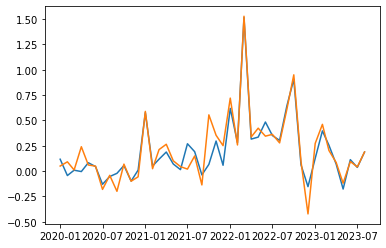

In [25]:
print('AIC vs BIC select model comparison : estimated supply component of MoM% inflation')
plt.plot(cpi_eu.shapiro_aic_r[(cpi_eu.shapiro_aic_r.index.year>=2020)]['sup'])
plt.plot(cpi_eu.shapiro_bic_r[(cpi_eu.shapiro_bic_r.index.year>=2020)]['sup'])

Classification alternative methodologies


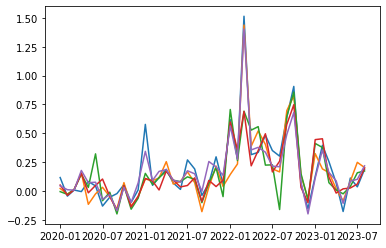

In [29]:
print('Classification alternative methodologies')
plt.plot(cpi_eu.shapiro_aic_r[(cpi_eu.shapiro_aic_r.index.year>=2020)][['sup','sup_j1','sup_j2','sup_j3','sup_param']])